This is an example script for camera calibration. It includes the following steps:
    1. Creating a configuration file and setting up file structures
    2. Creating a charucoboard or checkerboard
    3. Camera intrinsic calibration
    4. Camera extrinsic calibration
        4a. One-shot multi PnP
        4b. Sequential-stereo
    5. Loading an existing setup
    6. Calibrating an individual camera
    
Reference:
NCams Toolbox
Copyright 2020 Charles M Greenspon, Anton Sobinov
https://github.com/CMGreenspon/NCams

In [1]:
import ncams
import os
import time
import numpy as np
import cv2

In [2]:
# Working directory
BASE_DIR = r'C:\Users\Yiting\YitingData\Hand_tracking'
session_dir = r'23.08.04_calibration_test'
config_dir = os.path.join(BASE_DIR, session_dir)

In [3]:
#%% 1. Create the ncams_config
ncams_config = {
    # Camera information
    'serials': [19472072, 19472089], # serial numbers of cameras
    'reference_camera_serial': 19472072,  # This is linked to how the cameras are hardwired
    'image_size': (1200, 1920),  # height x width 
    # Board information
    'board_type': 'charuco',  # charuco (preferred) or checkerboard
    'board_dim': [6, 8],  # If this is incorrect it will cause analyses to freeze
    'check_size': 20, # Size of the checks in mm, essential for accurate 3D reconstructions
    'world_units': 'mm', # Determines how to scale the world ('m', 'dm', 'cm', 'mm')
    # Path information
    'setup_path': config_dir, # Where to store this configuration
    'setup_filename': 'ncams_config.yaml', # Desired filename for the configuration
    'intrinsic_path': 'intrinsic', # Name of the subdirectory for the intrinsic calibration data
    'intrinsic_filename': 'intrinsic_calib.pickle', # Desired filename for the intrinsics
    'extrinsic_path': 'extrinsic', # Name of the subdirectory for the extrinsic calibration data
    'extrinsic_filename': 'extrinsic_calib.pickle'}

ncams.camera_io.config_to_yaml(ncams_config) # Export the config

In [4]:
# Prepare folders
if os.path.exists(config_dir) is False:
    os.mkdir(config_dir)

ncams.camera_io.config_to_yaml(ncams_config)

if os.path.exists(os.path.join(config_dir, ncams_config['extrinsic_path'])) is False:
    os.mkdir(os.path.join(config_dir, ncams_config['extrinsic_path']))
    
if os.path.exists(os.path.join(config_dir, ncams_config['intrinsic_path'])) is False:
    os.mkdir(os.path.join(config_dir, ncams_config['intrinsic_path']))
    
    for s in ncams_config['serials']:
        os.mkdir(os.path.join(config_dir, ncams_config['intrinsic_path'], str(s)))

In [ ]:
# Organize files based on the following structures if needed

## Intrinsic calibration
'''
Setup path
    intrinsic_path
        cam1_folder
            cam1_image1
            cam1_image2
        cam2_folder
        ...
        camN_folder
'''

## Extrinsic calibration: One-shot multi PnP
'''
Setup path
    extrinsic_path
        cam1_image
        cam2_image
        ...
        camN_image
'''

## Extrinsic calibration: Sequential-stereo
'''
Setup path
    extrinsic_path
        cam1_image1
        cam1_image2
        cam1_imageN
        cam2_image1
        ...
        camN_imageN
        
OR
Setup path
    extrinsic_path
        cam1
            cam1_image1
            cam1_image2
            cam1_imageN
        cam2
            cam2_image1
        ...
        camN
            camN_imageN
'''


In [ ]:
# #%% Import ncams_config.yaml if ncams_config.yaml is created
# ncams_config_path = os.path.join(BASE_DIR, session_dir, 'ncams_config.yaml')
# ncams_config = ncams.camera_io.yaml_to_config(ncams_config_path)

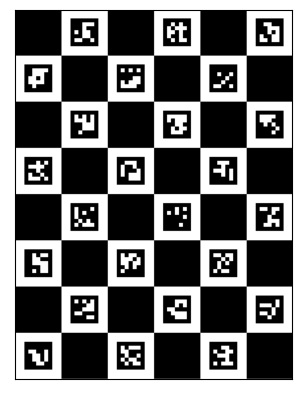

In [5]:
#%% 2. Create a board for calibration purposes
charuco_dict, charuco_board, board_img = ncams.camera_tools.create_board(ncams_config, output=True, output_format='jpg',plotting=True)
# Note that this function will create a checkerboard or charucoboard depending on the ncams_config

Beginning calibration of 2 cameras
- Camera 1 of 2.
--> 1 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000038.jpg
--> 7 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000041.jpg
--> 4 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000042.jpg
--> 9 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000045.jpg
--> 7 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000051.jpg
--> 12 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000053.jpg
--> 11 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration

--> 34 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000207.jpg
--> 26 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000209.jpg
--> 27 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000214.jpg
--> 19 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000218.jpg
--> 19 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000219.jpg
--> 14 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000221.jpg
--> 10 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472072\19472072-000000224.jpg

-> There may be a fisheye effect. Inspect the calibration.
- Camera 2 of 2.
--> 1 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000038.jpg
--> 3 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000041.jpg
--> 3 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000042.jpg
--> 3 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000045.jpg
--> 6 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000051.jpg
--> 9 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000053.jpg
--> 6 markers detected in image: C:\Users\Yiting\YitingData\Hand_trackin

--> 30 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000207.jpg
--> 26 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000209.jpg
--> 14 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000214.jpg
--> 12 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000218.jpg
--> 12 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000219.jpg
--> 12 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000221.jpg
--> 12 markers detected in image: C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\19472089\19472089-000000224.jpg

-> There may be a fisheye effect. Inspect the calibration.
* Calibration complete.
Intrinsics exported to: "C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\intrinsic\intrinsic_calib.pickle"


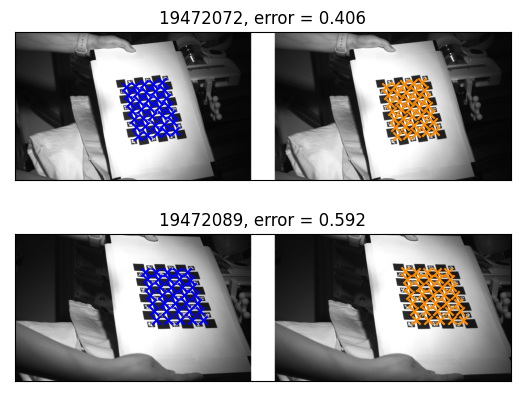

In [6]:
#%% 3. Intrinsic calibration
'''
The below text describes how the folder structure should be formatted so that NCams knows where to 
look for the relevant images. The exact subfolder names are defined in the ncams_config above. These
can be changed but must still be in the same directory:
Setup path
    intrinsic_path
        cam1_folder
            cam1_image1
            cam1_image2
        cam2_folder
        ...
        camN_folder
        
The 'multi_camera_intrinsic_calibration' function takes the config, assumes the above folder structure
and will attempt to determine the intrinsic calibration of each camera. It is imperative to inspect
the calibration to determine if the steps were successful as without it subsequent extrinsic calibration
and triangulation efforts will fail.

The override parameter will force calibration to occur even if a pre-existing calibration file is
detected.
'''

intrinsics_config = ncams.camera_calibration.multi_camera_intrinsic_calibration(
    ncams_config, override=True, inspect=False, export_full=True, verbose=True)
# Equivalent of inspect=True
ncams.camera_calibration.inspect_intrinsics(ncams_config, intrinsics_config)

Extrinsics exported to: "C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration_test\extrinsic\extrinsic_calib.pickle"
	Some markers have not triangulated well.

Mean/median 3D error = 0.205, 0.176 mm
Mean/median 2D error = 0.464, 0.464 pixels


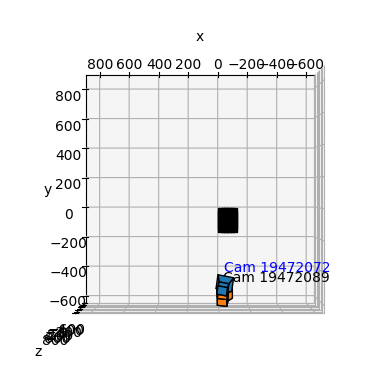

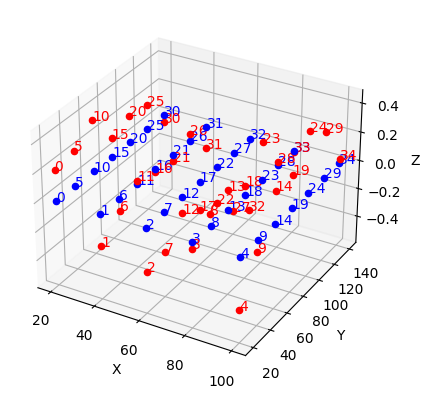

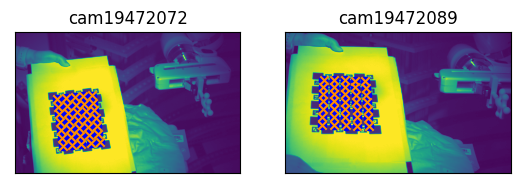

In [9]:
#%% 4a. Extrinsic calibration: one_shot_multi_PnP
'''
If all cameras have an overlapping view then it is possible to determine their relative locations
from a single synchronized image. If this is not the case one must use 'sequential_stereo' extrinsic
calibration instead (4b). When this function is called it assumes that the extrinsic path has no sub-
directories and only has one image for each camera:
Setup path
    extrinsic_path
        cam1_image
        cam2_image
        ...
        camN_image
'''

# ncams_config['extrinsic_path'] = 'Extrinsic_OS'

extrinsics_config, extrinsics_info = ncams.camera_pose.one_shot_multi_PnP(
    ncams_config, intrinsics_config, export_full=True, show_extrinsics=False, inspect=False,
    ch_ids_to_ignore=None)
# Equivalent of inspect=True and show_extrinsics=True
ncams.camera_pose.plot_extrinsics(extrinsics_config, ncams_config)
ncams.camera_pose.inspect_extrinsics(ncams_config, intrinsics_config, extrinsics_config,
                                     extrinsics_info, error_threshold=0.1, world_points=None)

ncams.camera_io.config_to_yaml(ncams_config) # Export the config with Extrinsic_OS as extrinsic_path

In [5]:
#%% 4b. Extrinsic calibration: sequential-stereo
'''
When all cameras do not have a shared view of a planar board - for example they are facing each 
other - their relative poses cannot be computed in a single step without a 3D calibration object.
Instead, if multiple adjacent cameras have a shared view (each camera shares a view with 2 others) 
then the relative positions between each pair of cameras can be combined (daisy chained). This, 
however, comes with the risk of accumulating errors in the relative position. Consequently, 
the fewer links needed to  determine the relative position between the reference camera and all
other cameras the better. Therefore it is ideal to use a central camera as the reference camera.
If 'daisy_chain' is not enabled then instead every camera will be stereo-calibrated with the 
reference camera.

The format of the image directory must be either:
Setup path
    extrinsic_path
        cam1_image1
        cam1_image2
        cam1_imageN
        cam2_image1
        ...
        camN_imageN
        
OR
Setup path
    extrinsic_path
        cam1
            cam1_image1
            cam1_image2
            cam1_imageN
        cam2
            cam2_image1
        ...
        camN
            camN_imageN
            
It is imperative that the image number for each camera reflects the time point that each image was 
taken at. That is to say that cam1_image10 and cam3_image10 must have been taken at the same time.
'''
# ncams_config['extrinsic_path'] = 'Extrinsic_SS'

cam_image_points, cam_charuco_ids = ncams.camera_pose.charuco_board_detector(ncams_config)

extrinsics_config = ncams.camera_pose.sequential_stereo_estimation(
    ncams_config, intrinsics_config, cam_image_points, cam_charuco_ids, daisy_chain=True,
    max_links=3, matching_threshold=1250, export_full=True, show_extrinsics=False)
ncams.camera_pose.plot_extrinsics(extrinsics_config, ncams_config)


Camera calibration loaded.
Pose estimation loaded.


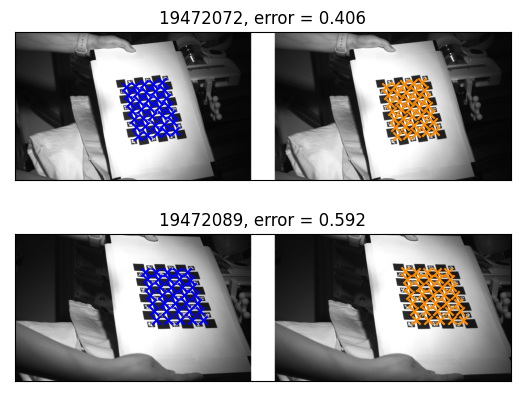

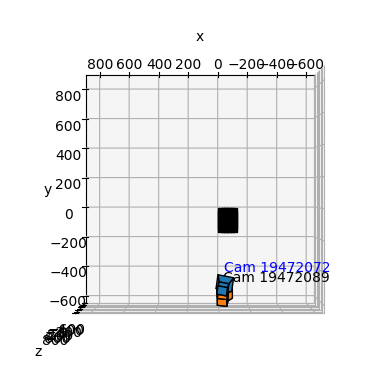

In [10]:
#%% 5. Loading an existing setup
'''
Once calibration has been completed the values can be revisited for inspection/sanity checking.
These are also the steps necessary for other examples (included there too) for triangulation,
video creation, inverse kinematics, etc.
'''

# Path of the ncams dictionary as described/created in (1)
ncams_config_path = os.path.join(BASE_DIR, session_dir, 'ncams_config.yaml')
# Load the dictionary which contains all necessary info for the system
ncams_config = ncams.camera_io.yaml_to_config(ncams_config_path)
# Import existing calibrations - note 
intrinsics_config, extrinsics_config = ncams.camera_io.load_calibrations(ncams_config)
# See if the imported calibrations are sensible
ncams.camera_calibration.inspect_intrinsics(ncams_config, intrinsics_config)
ncams.camera_pose.plot_extrinsics(extrinsics_config, ncams_config)

In [11]:
# Load calibration data
import pickle
file = open(r'C:\Users\Yiting\YitingData\Hand_tracking\23.08.04_calibration\extrinsic\extrinsic_calib.pickle', 'rb')
data = pickle.load(file)
data

{'serials': [19472072, 19472089],
 'world_locations': [array([[-195.69236955],
         [ -41.53198283],
         [ 916.79654965]]),
  array([[-156.75488994],
         [ -68.42325808],
         [ 755.12035396]])],
 'world_orientations': [array([[-0.4872291 ],
         [-0.14327015],
         [-0.15870243]]),
  array([[-0.72325123],
         [-0.16857688],
         [-0.04600708]])],
 'path': 'C:\\Users\\Yiting\\YitingData\\Hand_tracking\\23.08.04_calibration\\extrinsic',
 'filename': 'extrinsic_calib.pickle',
 'estimate_method': 'one-shot'}

In [ ]:
#%% 6. Calibrating an individual camera
'''
If one wishes to merely calculate the camera_matrix and/or distortion_coefficients without 
keeping values in an 'intrinsics_config' then the values can be calculated as shown below.

Note: the 'inspect_intrinsics' function cannot be called here as no 'intrinsics_config' has been
created. The reprojection error and the exported marked images are the appropriate way to determine
if an individual camera has been calibrated properly.
'''

# serial = 19472072
serial = 19472089

# Path of the ncams dictionary as described/created in (1)
ncams_config_path = os.path.join(BASE_DIR, session_dir, 'ncams_config.yaml')
# Load the dictionary which contains all necessary info for the system
ncams_config = ncams.camera_io.yaml_to_config(ncams_config_path)
# Create a board using the config info
charuco_dict, charuco_board, _ = ncams.camera_tools.create_board(ncams_config, plotting=False)
# Declare the path of the calibration images and get their paths
cam_dir = os.path.join(BASE_DIR, session_dir, 'intrinsic', str(serial))
cam_image_list = ncams.utils.get_image_list(cam_dir)
# Calibrate with those images
reprojection_error, camera_matrix, distortion_coefficients, detected_points = ncams.camera_calibration.charuco_calibration(
    cam_image_list, charuco_dict, charuco_board, export_marked_images=False, verbose=True)
# Evaluate calibration
ncams.camera_calibration.inspect_intrinsics_single(ncams_config, cam_image_list, camera_matrix,
                              distortion_coefficients, detected_points)
print('Reprojection error = ' + str(np.around(reprojection_error[0], 3)) + ' ' + ncams_config['world_units'])

# Export if calibration is good
if reprojection_error[0] < 1:
    cam_calib_filename = os.path.join(cam_dir, 'cam' + str(serial) + '_calib.yaml')
    
    camera_calib_dict = {
         'serial': serial,
         'distortion_coefficients': distortion_coefficients,
         'camera_matrix': camera_matrix,
         'reprojection_error': reprojection_error,
         'calibration_images': cam_image_list,
         'detected_markers': detected_points,
     }
    ncams.camera_io.intrinsic_to_yaml(cam_calib_filename, camera_calib_dict)